time to execute for k= 3 : 1.7637815059933928 s
time to execute for k= 3 : 1.410848930994689 s
time to execute for k= 3 : 2.125614721000602 s
time to execute for k= 3 : 1.696274795998761 s
time to execute for k= 3 : 1.5237784259952605 s
time to execute for k= 3 : 1.9185236480043386 s
time to execute for k= 3 : 2.1922789630043553 s
   dim    TP     TN    FP    FN  accuracy  precision    recall  specificity
0  1.0  53.0  167.0  56.0  55.0  0.664653   0.486239  0.490741     0.251121
1  2.0  29.0  176.0  47.0  79.0  0.619335   0.381579  0.268519     0.210762
2  3.0  79.0  153.0  70.0  29.0  0.700906   0.530201  0.731481     0.313901
3  4.0  72.0  155.0  68.0  36.0  0.685801   0.514286  0.666667     0.304933
4  5.0  86.0  149.0  74.0  22.0  0.709970   0.537500  0.796296     0.331839
5  6.0  61.0  165.0  58.0  47.0  0.682779   0.512605  0.564815     0.260090
6  7.0  69.0  162.0  61.0  39.0  0.697885   0.530769  0.638889     0.273543
calculating kNN for  Xn
time to execute for k= 3 : 2.040548

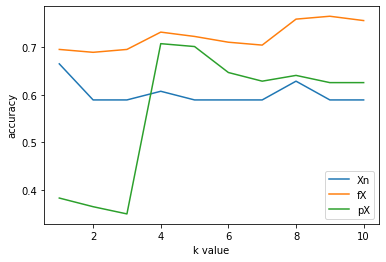

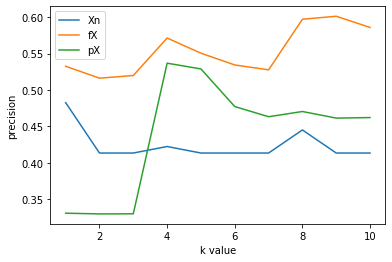

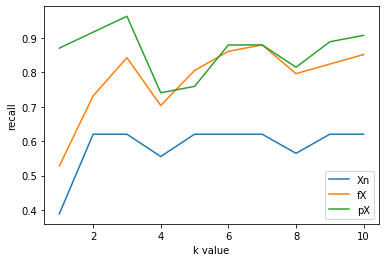

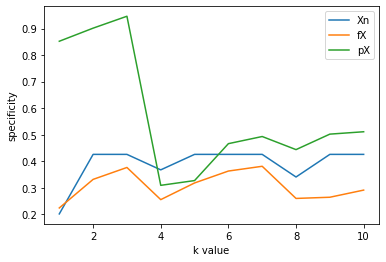

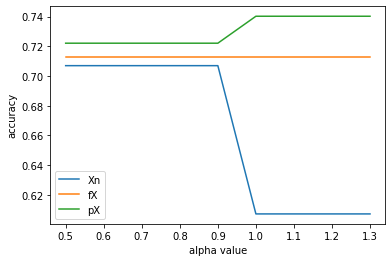

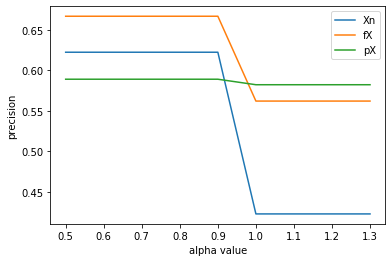

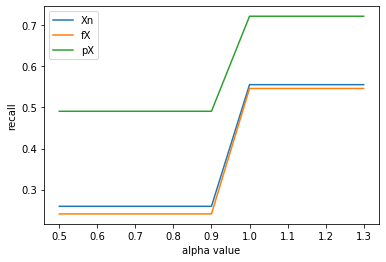

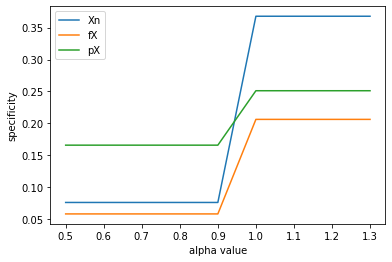

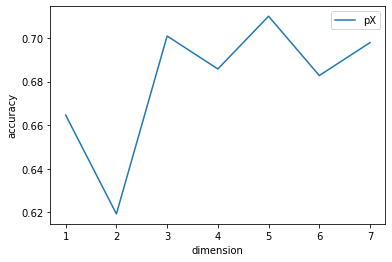

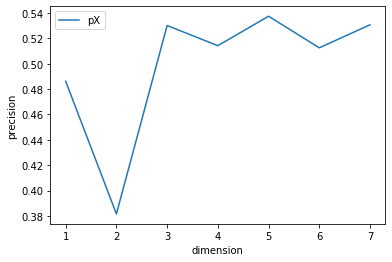

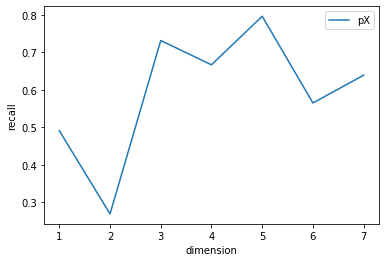

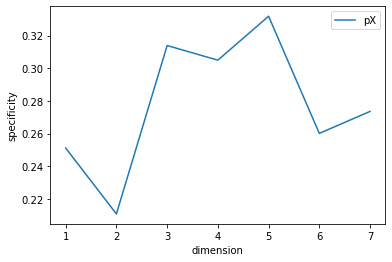

In [322]:
import sys
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import timeit
import argparse
import mpp
from sklearn.decomposition import PCA
pi= 3.14159265359

def input_data(filename):
    data = pd.read_csv(filename, sep=',', header = 0)
    return data

def kNN_class_sin(i,data_tr, data_te, k,prior_p_c0, prior_p_c1, alpha): #reads in training and testing data set, k value, prior probabilities and alpha to ouput a class for 1 dp
    eu_dist=eucl_dist(i,data_tr, data_te, k,prior_p_c0, prior_p_c1, alpha)
    data_sort=pd.concat([eu_dist,data_tr['type']],axis=1)    #assigns a class to each distance
    data_sort=data_sort.sort_values(by=[0],ascending=True) #sorts by closest data points
    k_data_points=data_sort.head(k)  #gets the first 5 closest data points
    n_0=(k_data_points.iloc[:,1]==0).sum()
    n_1=(k_data_points.iloc[:,1]==1).sum()
    M=alpha*prior_p_c1/prior_p_c0 #factor by which number of p1 points which lie in a k radius is multiplied by 
    Mn_1=M*n_1
    if (Mn_1>n_0):
        return 1
    elif (Mn_1<n_0):
        return 0
    elif (Mn_1==n_0):
        print(n_0)
        print(n_1)
        print("error in kNN, values are equal")
        
def kNN_class(data_tr, data_te, k, alpha): #reads in a data frame and appends the class which kNN identifies it belongs to in type_kNN column
    start = timeit.default_timer()
    c0_count=(data_tr.type==0).sum()    #prior calculation
    c1_count=(data_tr.type==1).sum()
    c0_pr=c0_count/(c1_count+c0_count)
    c1_pr=c1_count/(c1_count+c0_count)
    data_updated=data_te.copy()
    data_updated['type_'+str(k)+'NN']=2
    for i in range(0,data_te.shape[0]): #loops over all points in test file
        data_updated.loc[i,'type_'+str(k)+'NN']=kNN_class_sin(i,data_tr, data_te, k,c0_pr, c1_pr, alpha)   
    stop = timeit.default_timer()
    print('time to execute for k=',k,':', stop - start,'s')  
    return data_updated

def kNN_class_alpha(data_tr, data_te, k, alpha): #reads in a data frame and appends the class which kNN identifies it belongs to in type_kNN column
    start = timeit.default_timer()
    c0_count=(data_tr.type==0).sum()    #prior calculation
    c1_count=(data_tr.type==1).sum()
    c0_pr=c0_count/(c1_count+c0_count)
    c1_pr=c1_count/(c1_count+c0_count)
    data_updated=data_te.copy()
    data_updated['alpha='+str(alpha)]=2
    for i in range(0,data_te.shape[0]): #loops over all points in test file
        data_updated.loc[i,'alpha='+str(alpha)]=kNN_class_sin(i,data_tr, data_te, k,c0_pr, c1_pr, alpha)   
    stop = timeit.default_timer()
    print('time to execute for k=',k,':', stop - start,'s')  
    return data_updated

def kNN_class_dim(data_tr, data_te, k, alpha,dim): #reads in a data frame and appends the class which kNN identifies it belongs to in type_kNN column
    start = timeit.default_timer()
    c0_count=(data_tr.type==0).sum()    #prior calculation
    c1_count=(data_tr.type==1).sum()
    c0_pr=c0_count/(c1_count+c0_count)
    c1_pr=c1_count/(c1_count+c0_count)
    data_updated=data_te.copy()
    data_updated['dim='+str(dim)]=2
    for i in range(0,data_te.shape[0]): #loops over all points in test file
        data_updated.loc[i,'dim='+str(dim)]=kNN_class_sin(i,data_tr, data_te, k,c0_pr, c1_pr, alpha)   
    stop = timeit.default_timer()
    print('time to execute for k=',k,':', stop - start,'s')  
    return data_updated



def eu_dist_mean(mean_df,df):
    eu_dist=1
    return eu_dist

def case_1(data_tr, data_te,alpha): #takes data and prior scaling returning what class each point belongs to based on case used in project 1
    c0_count=(data_tr.type==0).sum()    #prior calculation
    c1_count=(data_tr.type==1).sum()
    c0_pr=c0_count/(c1_count+c0_count)
    c1_pr=c1_count/(c1_count+c0_count)        
    return data_c1

def case_2(data_tr, data_te,alpha):
    return data_c2

def case_3(data_tr, data_te,alpha):
    return data_c3
    
#takes in data and returns and returns the TP/TN/FP/FN rate for each different column (kNN, case 1 etc.)
#Positive is having the disease, negative is not having the disease
def TP(data_te,groupname): #has disease and is diagnosed as such (1->1)
    grouped_count=data_te.groupby(['type',groupname]).size()
    TP=grouped_count.iloc[3]
    return TP

def TN(data_te,groupname): #does not have disease and is diagnosed as such (0->0)
    grouped_count=data_te.groupby(['type',groupname]).size()
    TN=grouped_count.iloc[0]    
    return TN

def FP(data_te,groupname): #does not have disease but is diagnosed as having did (0->1)
    grouped_count=data_te.groupby(['type',groupname]).size()
    FP=grouped_count.iloc[1]   
    return FP

def FN(data_te,groupname): #does have disease but is diagnosed as not having it (1->0)
    grouped_count=data_te.groupby(['type',groupname]).size()
    FN=grouped_count.iloc[2]   
    return FN

def k_vary(data_tr,data_te,label):  
    #k varying
    k_range=10 #square root of n for training data
    k_output=np.zeros((k_range,9))
    k_output=pd.DataFrame(k_output,columns=['k','TP','TN','FP','FN','accuracy','precision','recall','specificity'])
    print("calculating kNN for ",label)
    for k in range(1,k_range+1): #performs kNN for k=1 up to k=50 including prior probability calculated from training data (not varied using alpha) and outputs accuracy
        k_string='type_'+str(k)+'NN'
        data_tmp=kNN_class(data_tr, data_te, k, 5) #returns the class each points belong to based on k input (priors are calculated in this function)
        k_output.loc[k-1][0]=k
        k_output.loc[k-1][1]=TP(data_tmp,k_string)
        k_output.loc[k-1][2]=TN(data_tmp,k_string)
        k_output.loc[k-1][3]=FP(data_tmp,k_string)
        k_output.loc[k-1][4]=FN(data_tmp,k_string)
    k_output.loc[:,'accuracy']=(k_output.loc[:,'TP']+k_output.loc[:,'TN'])/(k_output.loc[:,'FP']+k_output.loc[:,'FN']+k_output.loc[:,'TP']+k_output.loc[:,'TN']) #accuracy calculation
    k_output.loc[:,'precision']=(k_output.loc[:,'TP'])/(k_output.loc[:,'FP']+k_output.loc[:,'TP']) 
    k_output.loc[:,'recall']=(k_output.loc[:,'TP'])/(k_output.loc[:,'FN']+k_output.loc[:,'TP'])
    k_output.loc[:,'specificity']=(k_output.loc[:,'FP'])/(k_output.loc[:,'FP']+k_output.loc[:,'TN'])
    
    
    del(data_tmp)
    return k_output
    
def classifier_comp(data_tr,data_te,k):
    k_string='type_'+str(k)+'NN'
    C_comp=np.zeros((4,4))
    C_comp=pd.DataFrame(C_comp,columns=['TP','TN','FP','FN'])
    k_string='type_'+str(k)+'NN'
    data_tmp=kNN_class(data_tr, data_te, k, 1) #returns the class each points belong to based on k input (priors are calculated in this function)
    C_comp.loc[0,'TP']=TP(data_tmp.copy(),k_string)
    C_comp.loc[0,'TN']=TN(data_tmp.copy(),k_string)
    C_comp.loc[0,'FP']=FP(data_tmp.copy(),k_string)
    C_comp.loc[0,'FN']=FN(data_tmp.copy(),k_string)
    del(data_tmp)
    C_comp=np.divide(C_comp,data_te.shape[0]) #normalizes TP,TN,FP,FN to total number of data points
    classifier=['kNN','C1','C2','C3']
    C_comp.insert(0,'classifier',label,True)
    return C_comp

def eucl_dist(i,data_tr, data_te, k,prior_p_c0, prior_p_c1, alpha):
    data_te_point=np.zeros((data_tr.shape[0],data_tr.shape[1]-1))+data_te.loc[i][0]    
    data_te_point=pd.DataFrame(data_te_point)
    data_tr_temp=pd.DataFrame(data_tr.iloc[:,0:data_tr.shape[1]-1]).copy()
    eu_dist=pd.DataFrame(data_tr_temp.to_numpy()-data_te_point.to_numpy())**2  #calculate euclidena distance between points
    eu_dist=eu_dist.sum(axis=1)
    eu_dist=np.sqrt(eu_dist)
    return eu_dist

def alpha_vary(data_tr,data_te,label):
    alpha_range=10
    alpha_output=np.zeros((alpha_range,9))
    alpha_output=pd.DataFrame(alpha_output,columns=['alpha','TP','TN','FP','FN','accuracy','precision','recall','specificity'])
    print("calculating kNN for ",label)    
    for i in range(1,alpha_range):
        alpha=0.4+i*0.1
        alpha_string='alpha='+str(alpha)
        data_tmp=kNN_class_alpha(data_tr, data_te, 3, alpha) 
        alpha_output.loc[i-1][0]=alpha
        alpha_output.loc[i-1][1]=TP(data_tmp,alpha_string)
        alpha_output.loc[i-1][2]=TN(data_tmp,alpha_string)
        alpha_output.loc[i-1][3]=FP(data_tmp,alpha_string)
        alpha_output.loc[i-1][4]=FN(data_tmp,alpha_string)
    alpha_output.loc[:,'accuracy']=(alpha_output.loc[:,'TP']+alpha_output.loc[:,'TN'])/(alpha_output.loc[:,'FP']+alpha_output.loc[:,'FN']+alpha_output.loc[:,'TP']+alpha_output.loc[:,'TN']) #accuracy calculation
    alpha_output.loc[:,'precision']=(alpha_output.loc[:,'TP'])/(alpha_output.loc[:,'FP']+alpha_output.loc[:,'TP']) 
    alpha_output.loc[:,'recall']=(alpha_output.loc[:,'TP'])/(alpha_output.loc[:,'FN']+alpha_output.loc[:,'TP'])
    alpha_output.loc[:,'specificity']=(alpha_output.loc[:,'FP'])/(alpha_output.loc[:,'FP']+alpha_output.loc[:,'TN'])
    return alpha_output
    
def dimension_vary(data_tr,data_te,ndim):
    pca=PCA(ndim) 
    data_tr_tmp=pca.fit_transform(data_tr)#performs PCA 7->5 dimensions
    data_te_tmp=pca.fit_transform(data_te)
    data_tr_tmp = pd.DataFrame(data_tr_tmp)#converts from np array to pandas df
    data_te_tmp = pd.DataFrame(data_te_tmp) 
    return data_te_tmp

def dimension_vary_overall(data_tr,data_te):
    ndim_range=8
    class_tr=data_tr['type']#saves the type column
    class_te=data_te['type']
    data_tr.drop(['type'],axis=1,inplace=True) #drops the type column 
    data_te.drop(['type'],axis=1,inplace=True) 
    dim_output=np.zeros((ndim_range-1,9))
    dim_output=pd.DataFrame(dim_output,columns=['dim','TP','TN','FP','FN','accuracy','precision','recall','specificity'])
    for i in range(1,ndim_range):
        dim_string='dim='+str(i)
        data_tr_tmp=dimension_vary(data_tr.copy(),data_tr.copy(),i)
        data_te_tmp=dimension_vary(data_tr.copy(),data_te.copy(),i)        
        data_tr_tmp=pd.concat([data_tr_tmp,class_tr.copy()],axis=1)#read the classes back in
        data_te_tmp=pd.concat([data_te_tmp,class_te.copy()],axis=1)        
        data_tmp=kNN_class_dim(data_tr_tmp,data_te_tmp,3,1,i)   
        dim_output.loc[i-1][0]=i
        dim_output.loc[i-1][1]=TP(data_tmp,dim_string)
        dim_output.loc[i-1][2]=TN(data_tmp,dim_string)
        dim_output.loc[i-1][3]=FP(data_tmp,dim_string)
        dim_output.loc[i-1][4]=FN(data_tmp,dim_string)
    dim_output.loc[:,'accuracy']=(dim_output.loc[:,'TP']+dim_output.loc[:,'TN'])/(dim_output.loc[:,'FP']+dim_output.loc[:,'FN']+dim_output.loc[:,'TP']+dim_output.loc[:,'TN']) #accuracy calculation
    dim_output.loc[:,'precision']=(dim_output.loc[:,'TP'])/(dim_output.loc[:,'FP']+dim_output.loc[:,'TP']) 
    dim_output.loc[:,'recall']=(dim_output.loc[:,'TP'])/(dim_output.loc[:,'FN']+dim_output.loc[:,'TP'])
    dim_output.loc[:,'specificity']=(dim_output.loc[:,'FP'])/(dim_output.loc[:,'FP']+dim_output.loc[:,'TN'])
    print(dim_output)
    return(dim_output)
        


    
#Input data
Xn_tr=input_data('Xn.tr')#data read in 
Xn_te=input_data('Xn.te')
pX_tr=input_data('pX.tr')
pX_te=input_data('pX.te')
fX_tr=input_data('fX.tr')
fX_te=input_data('fX.te')

#varying dimension
pX_dim_output=dimension_vary_overall(Xn_tr.copy(),Xn_te.copy())


#variation of prior
Xn_alpha_output=alpha_vary(Xn_tr,Xn_te,'Xn')
fX_alpha_output=alpha_vary(fX_tr,fX_te,'fX')
pX_alpha_output=alpha_vary(pX_tr,pX_te,'pX')

#Classifier_comparison (using k=3 as this has best performance)
Xn_class_comp=classifier_comp(Xn_tr,Xn_te,3)
Xn_class_comp.to_csv(r'/home/across/UTK_PhD/Machine_learning_fall_2019/project_2/Xn_class_comp.csv',index=False)
pX_class_comp=classifier_comp(pX_tr,pX_te,3)
pX_class_comp.to_csv(r'/home/across/UTK_PhD/Machine_learning_fall_2019/project_2/pX_class_comp.csv',index=False)
fX_class_comp=classifier_comp(fX_tr,fX_te,3)
fX_class_comp.to_csv(r'/home/across/UTK_PhD/Machine_learning_fall_2019/project_2/fX_class_comp.csv',index=False)

#k varying
Xn_k_output=k_vary(Xn_tr,Xn_te,'Xn')
fX_k_output=k_vary(fX_tr,fX_te,'fX')
pX_k_output=k_vary(pX_tr,pX_te,'pX')

plt.figure() #plots accuracy vs k value
plt.plot(Xn_k_output['k'],Xn_k_output['accuracy'],label='Xn')
plt.plot(fX_k_output['k'],fX_k_output['accuracy'],label='fX')
plt.plot(pX_k_output['k'],pX_k_output['accuracy'],label='pX')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('k_var_acc.png')

plt.figure()
plt.plot(Xn_k_output['k'],Xn_k_output['precision'],label='Xn')
plt.plot(fX_k_output['k'],fX_k_output['precision'],label='fX')
plt.plot(pX_k_output['k'],pX_k_output['precision'],label='pX')
plt.xlabel('k value')
plt.ylabel('precision')
plt.legend()
plt.savefig('k_var_prec.png')

plt.figure()
plt.plot(Xn_k_output['k'],Xn_k_output['recall'],label='Xn')
plt.plot(fX_k_output['k'],fX_k_output['recall'],label='fX')
plt.plot(pX_k_output['k'],pX_k_output['recall'],label='pX')
plt.xlabel('k value')
plt.ylabel('recall')
plt.legend()
plt.savefig('k_var_rec.png')

plt.figure()
plt.plot(Xn_k_output['k'],Xn_k_output['specificity'],label='Xn')
plt.plot(fX_k_output['k'],fX_k_output['specificity'],label='fX')
plt.plot(pX_k_output['k'],pX_k_output['specificity'],label='pX')
plt.xlabel('k value')
plt.ylabel('specificity')
plt.legend()
plt.savefig('k_var_spec.png')

plt.figure() #plots accuracy vs k value
plt.plot(Xn_alpha_output['alpha'],Xn_alpha_output['accuracy'],label='Xn')
plt.plot(fX_alpha_output['alpha'],fX_alpha_output['accuracy'],label='fX')
plt.plot(pX_alpha_output['alpha'],pX_alpha_output['accuracy'],label='pX')
plt.xlabel('alpha value')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('alpha_var_acc.png')

plt.figure()
plt.plot(Xn_alpha_output['alpha'],Xn_alpha_output['precision'],label='Xn')
plt.plot(fX_alpha_output['alpha'],fX_alpha_output['precision'],label='fX')
plt.plot(pX_alpha_output['alpha'],pX_alpha_output['precision'],label='pX')
plt.xlabel('alpha value')
plt.ylabel('precision')
plt.legend()
plt.savefig('alpha_var_prec.png')

plt.figure()
plt.plot(Xn_alpha_output['alpha'],Xn_alpha_output['recall'],label='Xn')
plt.plot(fX_alpha_output['alpha'],fX_alpha_output['recall'],label='fX')
plt.plot(pX_alpha_output['alpha'],pX_alpha_output['recall'],label='pX')
plt.xlabel('alpha value')
plt.ylabel('recall')
plt.legend()
plt.savefig('alpha_var_rec.png')

plt.figure()
plt.plot(Xn_alpha_output['alpha'],Xn_alpha_output['specificity'],label='Xn')
plt.plot(fX_alpha_output['alpha'],fX_alpha_output['specificity'],label='fX')
plt.plot(pX_alpha_output['alpha'],pX_alpha_output['specificity'],label='pX')
plt.xlabel('alpha value')
plt.ylabel('specificity')
plt.legend()
plt.savefig('alpha_var_spec.png')

plt.figure() #plots accuracy vs k value
#plt.plot(Xn_dim_output['dim'],Xn_dim_output['accuracy'],label='Xn')
#plt.plot(fX_dim_output['dim'],fX_dim_output['accuracy'],label='fX')
plt.plot(pX_dim_output['dim'],pX_dim_output['accuracy'],label='pX')
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('dim_var_acc.png')

plt.figure()
#plt.plot(Xn_dim_output['dim'],Xn_dim_output['precision'],label='Xn')
#plt.plot(fX_dim_output['dim'],fX_dim_output['precision'],label='fX')
plt.plot(pX_dim_output['dim'],pX_dim_output['precision'],label='pX')
plt.xlabel('dimension')
plt.ylabel('precision')
plt.legend()
plt.savefig('dim_var_prec.png')

plt.figure()
#plt.plot(Xn_dim_output['dim'],Xn_dim_output['recall'],label='Xn')
#plt.plot(fX_dim_output['dim'],fX_dim_output['recall'],label='fX')
plt.plot(pX_dim_output['dim'],pX_dim_output['recall'],label='pX')
plt.xlabel('dimension')
plt.ylabel('recall')
plt.legend()
plt.savefig('dim_var_rec.png')

plt.figure()
#plt.plot(Xn_dim_output['dim'],Xn_dim_output['specificity'],label='Xn')
#plt.plot(fX_dim_output['dim'],fX_dim_output['specificity'],label='fX')
plt.plot(pX_dim_output['dim'],pX_dim_output['specificity'],label='pX')
plt.xlabel('dimension')
plt.ylabel('specificity')
plt.legend()
plt.savefig('dim_var_spec.png')






